In [1]:
pip install pillow

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 4.4 MB 1.6 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install dlib

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 3.3 MB 2.0 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  ERROR: Command errored out with exit status 1:
   command: /usr/local/bin/python3.10 /usr/local/lib/python3.10/site-packages/pip/_vendor/pep517/in_process/_in_process.py build_wheel /tmp/tmpxtbedaeq
       cwd: /tmp/pip-install-eno18q0d/dlib_26f3f4d26ff243b6a6619efdd6b32768
  Complete output (6 lines):
  running bdist_wheel
  running build
  running build_ext
  
  ERROR: CMake must be installed to build dlib
  
  ----------------------------------------
  ERROR: Failed building wheel for dlib
Failed to build dlib
ERROR: Could not build wheels for dlib which use PEP 517 and cannot be installed directly
You should consider upgrading via the '/usr/local/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may

In [3]:

!pip install face_recognition Pillow numpy

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 3.1 MB 1.8 MB/s            
     |████████████████████████████████| 14.8 MB 2.4 MB/s             ████▏              | 7.9 MB 16.7 MB/s eta 0:00:01   | 8.8 MB 16.7 MB/s eta 0:00:01
  Using cached dlib-19.24.4.tar.gz (3.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     |████████████████████████████████| 100.1 MB 35.9 MB/s            
  Preparing metadata (setup.py) ... done
  ERROR: Command errored out with exit status 1:
   command: /usr/bin/python3 /home/thierry/.local/lib/python3.6/site-packages/pip/_vendor/pep517/in_process/_in_process.py build_wheel /tmp/tmp8utdpsb8
       cwd: /tmp/pip-install-ver_yx79/dlib_69b7169b37384b8eb7f401979a7e0aa3
  Complete output (6 lines):
  running bdist_wheel
  running build
  running build_ext
  
  ERROR: CMake must be installed to build dl

**CARREGANDO ARQUIVOS NO COLAB**

In [4]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

In [ ]:
df_ck_plus = pd.read_csv('./Datasets/ckextended.csv')
df_ck_plus

**CONVERTER A IMAGEM EM TONS DE CINZA**

In [ ]:
from PIL import Image
import os

def convert_images_to_grayscale(input_folder, output_folder):
    # Criar a pasta de saída, se não existir
    os.makedirs(output_folder, exist_ok=True)

    # Percorrer todas as imagens na pasta de entrada
    for filename in os.listdir(input_folder):
        if filename.lower().endswith('.jpeg') or filename.lower().endswith('.jpg'):
            # Caminho completo da imagem
            img_path = os.path.join(input_folder, filename)

            # Abrir a imagem
            with Image.open(img_path) as img:
                # Converter para grayscale
                grayscale_img = img.convert('L')

                # Caminho completo da imagem de saída
                output_path = os.path.join(output_folder, filename)

                # Salvar a imagem em grayscale
                grayscale_img.save(output_path)
                print(f'Imagem {filename} convertida e salva em {output_path}')

# Caminho para a pasta de entrada com imagens JPEG
input_folder = 'input_images'

# Caminho para a pasta de saída para salvar as imagens convertidas
output_folder = 'output_images_grayscale'

# Chamar a função para converter as imagens
convert_images_to_grayscale(input_folder, output_folder)


Imagem 0007_02.jpg convertida e salva em output_images_grayscale/0007_02.jpg
Imagem 0005_01.jpg convertida e salva em output_images_grayscale/0005_01.jpg
Imagem 0008_01.jpg convertida e salva em output_images_grayscale/0008_01.jpg
Imagem 0009_01.jpg convertida e salva em output_images_grayscale/0009_01.jpg
Imagem 0010_01.jpg convertida e salva em output_images_grayscale/0010_01.jpg
Imagem 0006_01.jpg convertida e salva em output_images_grayscale/0006_01.jpg


In [ ]:
import os

# Pasta contendo as imagens a serem renomeadas
output_dir = 'output_images_grayscale'

# Iterar por todos os arquivos na pasta de saída
for filename in os.listdir(output_dir):
    # Verificar se o arquivo tem uma extensão de imagem válida
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
        # Dividir o nome do arquivo e a extensão
        base, extension = os.path.splitext(filename)

        # Adicionar "gray" ao final do nome do arquivo
        new_filename = base + '_gray' + extension

        # Caminho completo do arquivo atual
        current_path = os.path.join(output_dir, filename)

        # Caminho completo do novo arquivo
        new_path = os.path.join(output_dir, new_filename)

        # Renomear o arquivo
        os.rename(current_path, new_path)

        print(f"Arquivo renomeado para {new_path}")


Arquivo renomeado para output_images_grayscale/0007_02_gray.jpg
Arquivo renomeado para output_images_grayscale/0005_01_gray.jpg
Arquivo renomeado para output_images_grayscale/0008_01_gray.jpg
Arquivo renomeado para output_images_grayscale/0009_01_gray.jpg
Arquivo renomeado para output_images_grayscale/0010_01_gray.jpg
Arquivo renomeado para output_images_grayscale/0006_01_gray.jpg


**REALIZANDO OS AJUSTES DO PRÉ-PROCESSAMENTO: RECORTE DO ROSTO,  ROTAÇÃO E CENTRALIZAÇÃO DO ROSTO**

In [ ]:
import dlib
from PIL import Image
import numpy as np
import os

def adjust_and_crop_face(image_path, output_folder):
    # Carregar a imagem
    image = dlib.load_rgb_image(image_path)

    # Inicializar o detector de rostos e o preditor de pontos-chave
    detector = dlib.get_frontal_face_detector()

    # Caminho completo para o arquivo shape_predictor_68_face_landmarks.dat
    dat_file_path = '/content/shape_predictor_68_face_landmarks.dat'
    # Carregar o preditor de forma
    predictor = dlib.shape_predictor(dat_file_path)

    # Detectar os rostos na imagem
    faces = detector(image, 1)

    # Criar a pasta de saída, se não existir
    os.makedirs(output_folder, exist_ok=True)

    # Processar cada rosto detectado
    for i, face in enumerate(faces):
        # Obter os pontos chave do rosto
        landmarks = predictor(image, face)

        # Converter os pontos chave para um formato utilizável
        face_landmarks = {
            "left_eye": [(landmarks.part(j).x, landmarks.part(j).y) for j in range(36, 42)],
            "right_eye": [(landmarks.part(j).x, landmarks.part(j).y) for j in range(42, 48)],
            "left_eyebrow": [(landmarks.part(j).x, landmarks.part(j).y) for j in range(17, 22)],
            "right_eyebrow": [(landmarks.part(j).x, landmarks.part(j).y) for j in range(22, 27)],
            "chin": [(landmarks.part(j).x, landmarks.part(j).y) for j in range(0, 17)],
        }

        # Obter os pontos dos olhos, sobrancelhas e queixo
        left_eye = np.array(face_landmarks['left_eye'])
        right_eye = np.array(face_landmarks['right_eye'])
        left_eyebrow = np.array(face_landmarks['left_eyebrow'])
        right_eyebrow = np.array(face_landmarks['right_eyebrow'])
        chin = np.array(face_landmarks['chin'])

        # Calcular o ponto médio entre os olhos
        left_eye_center = left_eye.mean(axis=0)
        right_eye_center = right_eye.mean(axis=0)
        eye_center = ((left_eye_center + right_eye_center) / 2).astype(int)

        # Calcular o ângulo para horizontalizar os olhos
        dy = right_eye_center[1] - left_eye_center[1]
        dx = right_eye_center[0] - left_eye_center[0]
        angle = np.degrees(np.arctan2(dy, dx))

        # Rotacionar a imagem para horizontalizar os olhos
        pil_image = Image.fromarray(image)
        pil_image = pil_image.rotate(angle, center=tuple(eye_center), expand=True)

        # Recalcular os pontos chave após rotação
        rotated_image = np.array(pil_image)
        rotated_faces = detector(rotated_image, 1)
        rotated_landmarks = predictor(rotated_image, rotated_faces[0])

        # Obter os novos pontos chave para sobrancelhas e queixo
        left_eyebrow = np.array([(rotated_landmarks.part(j).x, rotated_landmarks.part(j).y) for j in range(17, 22)])
        right_eyebrow = np.array([(rotated_landmarks.part(j).x, rotated_landmarks.part(j).y) for j in range(22, 27)])
        chin = np.array([(rotated_landmarks.part(j).x, rotated_landmarks.part(j).y) for j in range(0, 17)])

        # Calcular o topo das sobrancelhas e o fundo do queixo
        top_of_eyebrows = min(left_eyebrow[:,1].min(), right_eyebrow[:,1].min())
        bottom_of_chin = chin[:,1].max()

        # Calcular as coordenadas do recorte
        top = top_of_eyebrows
        bottom = bottom_of_chin
        left = min(chin[:,0].min(), left_eyebrow[:,0].min(), right_eyebrow[:,0].min())
        right = max(chin[:,0].max(), left_eyebrow[:,0].max(), right_eyebrow[:,0].max())

        # Recortar a imagem
        cropped_face = pil_image.crop((left, top, right, bottom))

        # Salvar a imagem recortada com o nome original acrescido de "face"
        base_filename, ext = os.path.splitext(os.path.basename(image_path))
        face_image_path = os.path.join(output_folder, f'{base_filename}_face{ext}')
        cropped_face.save(face_image_path)
        print(f'Rosto {i+1} salvo em {face_image_path}')

# Caminho para a pasta de entrada
input_folder = '/content/output_images_grayscale'

# Pasta para salvar os rostos recortados
output_folder = '/content/output_images_recortado'

# Processar cada imagem na pasta de entrada
for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
        image_path = os.path.join(input_folder, filename)
        adjust_and_crop_face(image_path, output_folder)


Rosto 1 salvo em /content/output_images_recortado/0008_01_gray_face.jpg
Rosto 1 salvo em /content/output_images_recortado/0010_01_gray_face.jpg
Rosto 1 salvo em /content/output_images_recortado/0009_01_gray_face.jpg
Rosto 1 salvo em /content/output_images_recortado/0005_01_gray_face.jpg
Rosto 1 salvo em /content/output_images_recortado/0007_02_gray_face.jpg
Rosto 1 salvo em /content/output_images_recortado/0006_01_gray_face.jpg


## Images

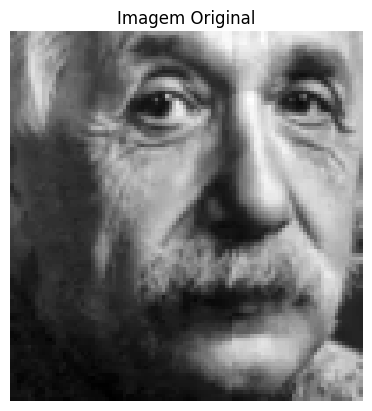

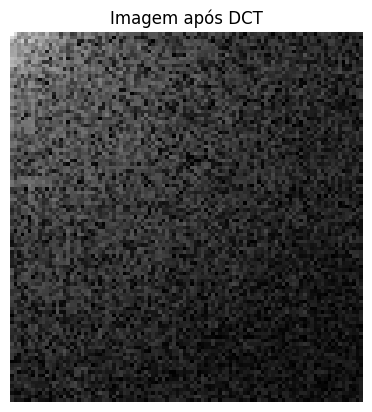

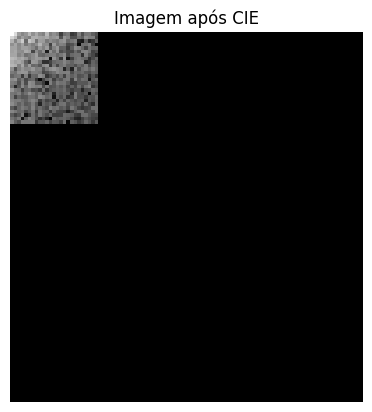

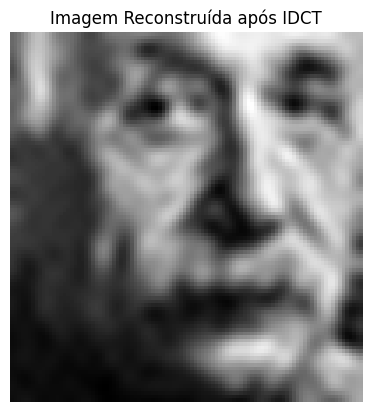

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct
from PIL import Image

# Função para aplicar DCT 2D
def apply_dct(image):
    return dct(dct(image.T, norm='ortho').T, norm='ortho')

# Função para realizar a CIE
def critical_information_extraction(dct_image, reduction_factor=0.25):
    rows, cols = dct_image.shape
    crow, ccol = int(rows * reduction_factor), int(cols * reduction_factor)
    cie_image = np.zeros_like(dct_image)
    cie_image[:crow, :ccol] = dct_image[:crow, :ccol]
    return cie_image

# Função para aplicar IDCT 2D
def apply_idct(dct_image):
    return idct(idct(dct_image.T, norm='ortho').T, norm='ortho')

# Carregar a imagem e converter para escala de cinza
image_path = './teste/output_face.png'
image = Image.open(image_path).convert('L')
image = np.array(image)

# Aplicar DCT
dct_image = apply_dct(image)

# Aplicar CIE com γ = 0.25
gamma = 0.25
cie_image = critical_information_extraction(dct_image, gamma)

# Aplicar IDCT para reconverter para o domínio espacial
reconstructed_image = apply_idct(cie_image)

# Exibir a imagem original
plt.figure()
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')
plt.show()

# Exibir a imagem após DCT
plt.figure()
plt.imshow(np.log1p(np.abs(dct_image)), cmap='gray')
plt.title('Imagem após DCT')
plt.axis('off')
plt.show()

# Exibir a imagem após CIE
plt.figure()
plt.imshow(np.log1p(np.abs(cie_image)), cmap='gray')
plt.title('Imagem após CIE')
plt.axis('off')
plt.show()

# Exibir a imagem reconstruída após IDCT
plt.figure()
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Imagem Reconstruída após IDCT')
plt.axis('off')
plt.show()


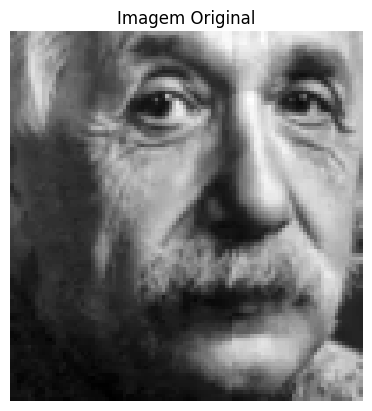

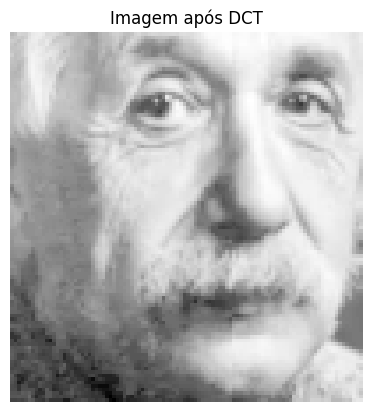

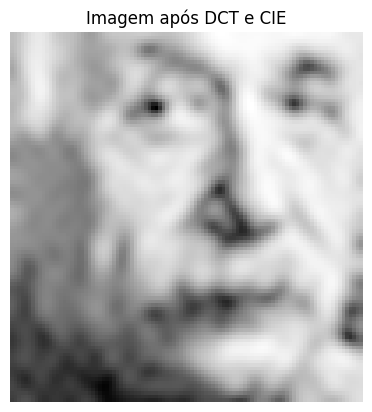

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct
from PIL import Image

# Função para aplicar DCT 2D
def apply_dct(image):
    return dct(dct(image.T, norm='ortho').T, norm='ortho')

# Função para realizar a CIE
def critical_information_extraction(dct_image, reduction_factor=0.25):
    rows, cols = dct_image.shape
    crow, ccol = int(rows * reduction_factor), int(cols * reduction_factor)
    cie_image = np.zeros_like(dct_image)
    cie_image[:crow, :ccol] = dct_image[:crow, :ccol]
    return cie_image

# Função para aplicar IDCT 2D
def apply_idct(dct_image):
    return idct(idct(dct_image.T, norm='ortho').T, norm='ortho')

# Carregar a imagem e converter para escala de cinza
image_path = './teste/output_face.png'
image = Image.open(image_path).convert('L')
image = np.array(image)

# Aplicar DCT
dct_image = apply_dct(image)

# Aplicar CIE
cie_image = critical_information_extraction(dct_image, reduction_factor=0.25)

# Aplicar IDCT para reconverter para o domínio espacial
reconstructed_image_1 = apply_idct(dct_image)

# Aplicar IDCT para reconverter para o domínio espacial
reconstructed_image_2 = apply_idct(cie_image)

# Exibir a imagem original
plt.figure()
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')
plt.show()

# Exibir a imagem após DCT
plt.figure()
plt.imshow(np.log1p(np.abs(reconstructed_image_1)), cmap='gray')
plt.title('Imagem após DCT')
plt.axis('off')
plt.show()

# Exibir a imagem após DCT e CIE
plt.figure()
plt.imshow(np.log1p(np.abs(reconstructed_image_2)), cmap='gray')
plt.title('Imagem após DCT e CIE')
plt.axis('off')
plt.show()
